# <center>Tato studijní pomůcka vznikla za podpory Inovačního projektu FSv ČVUT č. 15 "Inovativní pomůcky pro předměty Přetváření a porušování materiálů".</center>
<center>(c) 2024 Lenka Dohnalová <i>(lenka.dohnalova@fsv.cvut.cz)</i>, Petr Havlásek <i>(petr.havlasek@cvut.cz)</i>, Milan Jirásek <i>(milan.jirasek@cvut.cz)</i></center>

***
# Plasticita - podmínky plasticity - Mohr-Coulomb

## Zadání
Dva zcela identické vzorky ve tvaru krychle s délkou hrany 500 mm byly podrobeny několika zatěžovacím zkouškám. Předpokládejte, že chování materiálu je možné popsat pomocí ideálně pružnoplastického modelu s Mohrovou-Coulombovou podmínkou plasticity, přičemž úhel vnitřního tření je $\phi$ = 60$^{\circ}$.

Vzorek A byl namáhán jednoosým tahem a vzorek B jednoosým tlakem.

V první fázi byla u obou vzorků hodnota působící síly 875 kN a oba vzorky se nacházely v pružném stavu.
Při tomto namáhání se u vzorku A délka hrany ve směru působící síly zvětšila o 2 mm, u vzorku B bylo dosaženo objemové deformace $-2$ promile.

Ve druhé fázi byla u obou vzorků plynule zvyšována velikost působící síly až do dosažení plastického stavu (jednalo se stále o jednoosé namáhání).
U vzorku B došlo k dosažení plastického stavu při hodnotě tlakového napětí $50$ MPa.

Určete parametry popisující chování materiálu (modul pružnosti $E$, Poissonův součinitel $\nu$ a soudržnost $c_0$) a dále určete hodnoty jednotlivých složek napětí a deformací pro oba vzorky na konci každé fáze.

Mohrova-Coulombova funkce plasticity má tvar:  

$$f(\sigma)=\frac{1+\sin\phi}{2}\sigma_{\rm max} - \frac{1-\sin\phi}{2}\sigma_{\rm min} - c_{0}\cos\phi$$

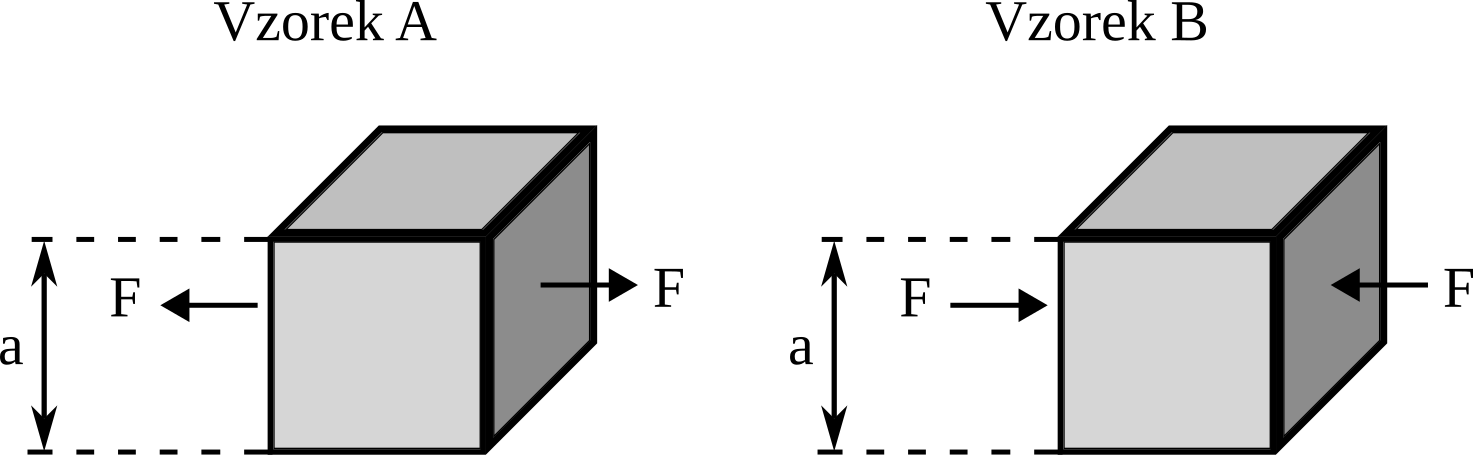

In [1]:
from IPython.display import display, Image
display(Image(filename="plasticita_kostka_A_B.png", width=600))

Import potřebných knihoven

In [2]:
%matplotlib inline

import math
import numpy as np

from IPython.display import Markdown as md

import matplotlib.pyplot as plt

from sympy import *
import sympy as smp


## Řešení

Směr zatěžování pro oba vzorky zvolíme například ve směru osy x.

**Definice proměnných pro symbolické výpočty**

In [3]:
a = smp.symbols('a', real=True, positive=True)  # délka hrany vzorků
phi = smp.symbols('\phi', real=True) # úhel vnitřního tření
F = smp.symbols('F', real=True) # působící síla
sigma = smp.symbols('\sigma', real=True) # napětí
eps = smp.symbols('\varepsilon', real=True) # deformace
delta_a = smp.symbols('\delta_a', real=True)  # protažení / zkrácení hrany vzorku
eps_V = smp.symbols('eps_{V}', real=True)  # objemová deformace vzorku
c_0 = smp.symbols('c_0', real=True)  # koheze (soudržnost)
sigma_max = smp.symbols('\sigma_{max}', real=True)  # maximální napětí
sigma_min = smp.symbols('\sigma_{min}', real=True)  # minimální napětí
eps_x = smp.symbols('\varepsilon_x', real=True)  # deformace ve směru osy x
eps_y = smp.symbols('\varepsilon_y', real=True)  # deformace ve směru osy y
eps_z = smp.symbols('\varepsilon_z', real=True)  # deformace ve směru osy z
sigma_x = smp.symbols('\sigma_x', real=True)  # napětí ve směru osy x
sigma_y = smp.symbols('\sigma_y', real=True)  # napětí ve směru osy y
sigma_z = smp.symbols('\sigma_z', real=True)  # napětí ve směru osy z
E = smp.symbols('E', real=True, positive=True)  # modulu pružnosti
nu = smp.symbols('\nu', real=True, positive=True)  # Poissonův součinitel

**Konkrétní hodnoty dle zadání**



In [4]:
val_phi = 60  # úhel vnitřního tření
val_a = 500   # [mm] délka hrany vzorků

val_FA = 875000  # [N] působící síla pro vzorek A v 1. fázi
val_FB = -875000  # [N] působící síla pro vzorek B v 1. fázi
val_dxA = 2  # [mm] protažení vzorku A ve směru působící síly v 1. fázi
val_epsVB = -0.002  # objemová deformace vzorku B v 1. fázi

val_sigma_plB = -50 # [MPa] ... napětí při dosažení plast. stavu vzorku B ve 2. fázi


###Výpočet materiálových parametrů

Pro určení pružných charakteristik (modulu pružnosti $E$, Poissonův součinitel $\nu$) využijeme rozšířený Hookeův zákon pro trojosou napjatost:  


$$\varepsilon_x = \frac{1}{E} \left( \sigma_x - \nu \sigma_y - \nu \sigma_z \right)$$

$$\varepsilon_y = \frac{1}{E} \left( \sigma_y - \nu \sigma_x - \nu \sigma_z \right)$$

$$\varepsilon_z = \frac{1}{E} \left( \sigma_z - \nu \sigma_x - \nu \sigma_y \right)$$

a dále vztah pro objemovou deformaci:  

$$\varepsilon_V = \varepsilon_x + \varepsilon_y + \varepsilon_z = \frac{(1 - 2\nu)}{E} \cdot \sigma_m$$

přičemž $\sigma_m$ je střední napětí:  
$$\sigma_m = \frac{1}{3}(\sigma_x + \sigma_y + \sigma_z)$$.


### 1. fáze

In [5]:
# Nejprve je nutné protažení hrany vzorku A přepočítat na deformaci:
eps_x_1 = delta_a / a
val_eps_xA_1 = eps_x_1.subs({delta_a: val_dxA, a: val_a})
print(f"Deformace vzorku A ve směru osy x v 1. fázi je {val_eps_xA_1:.3f}")

# Dále je potřeba dopočítat napětí ze zadané síly na konci 1. fáze:
sigma = F / a**2
val_sigma_xA_1 = sigma.subs({F: val_FA, a: val_a})
print(f"Napětí ve směru osy x pro vzorek A v 1. fázi je {val_sigma_xA_1:.3f} MPa")
val_sigma_xB_1 = sigma.subs({F: val_FB, a: val_a})
print(f"Napětí ve směru osy x pro vzorek B v 1. fázi je {val_sigma_xB_1:.3f} MPa")

# Vzorek A
# jednoosý tah, složky napětí ve směru y a z jsou nulové
sigma_y = 0
sigma_z = 0
# z Hookeova zákona, z rovnice pro eps_x
# eps_x = 1/E * (sigma_x - nu * sigma_y - nu * sigma_z)
# vyjádříme rovnici pro modul pružnosti:
# E = (sigma_x - nu * sigma_y - nu * sigma_z) / eps_x
# která se pro jedinou nenulovou složku napětí zjednoduší na:
E = sigma / eps
val_E = E.subs({sigma: val_sigma_xA_1, eps: val_eps_xA_1})
print(f"\033[1mHodnota modulu pružnosti je {val_E:.3f} MPa\033[0m")

# Vzorek B:
# z objemové deformace určíme jednotlivé složky deformace
# v pružné oblasti je chování v tahu i tlaku stejné, deformaci ve směru osy x určíme ze známe deformace vzorku A
val_eps_xB_1 = -val_eps_xA_1
print(f"Deformace vzorku B ve směru osy x v 1. fázi je {val_eps_xB_1:.3f}")
# při jednoosém namáhání budou složky napětí ve směru y a z nulové, deformace bude ve směru y a z stejná
sigma_y = 0
sigma_z = 0
eps_z = eps_y
# eps_V = eps_x_1 + eps_y + eps_z ... odtud vyjádříme eps_y
eps_y = 1/2 * (eps_V - eps_x)
val_eps_yB_1 = eps_y.subs({eps_V: val_epsVB, eps_x: val_eps_xB_1})
print(f"Deformace vzorku B ve směru osy y i ve směru osy z v 1. fázi je {val_eps_yB_1:.3f}")
# z Hookeova zákona dopočítáme hodnotu Poissonova součinitele:
# eps_y = 1/E * (-nu * sigma_x)
nu_eq = eps_y * E / (-sigma_x)
val_nu = nu_eq.subs({eps_y: val_eps_yB_1, E: val_E, sigma_x: val_sigma_xB_1})
print(f"\033[1mHodnota Poissonova součinitele je {val_nu:.3f}\033[0m")

# výpis složek deformací a napětí pro oba vzorky na konci 1. fáze:
val_eps_yA = 1/val_E * (- val_nu * val_sigma_xA_1)
print("\n")
print(f"\033[1mVzorek A - konec 1. fáze:\033[0m")
print(f"eps_x = {val_eps_xA_1:.3f}")
print(f"eps_y = eps_z = {val_eps_yA:.3f}")
print(f"sigma_x = {val_sigma_xA_1:.3f} MPa")
print(f"sigma_y = sigma_z = 0 MPa")

print("\n")
print(f"\033[1mVzorek B - konec 1. fáze:\033[0m")
print(f"eps_x = {val_eps_xB_1:.3f}")
print(f"eps_y = eps_z = {val_eps_yB_1:.3f}")
print(f"sigma_x = {val_sigma_xB_1:.3f} MPa")
print(f"sigma_y = sigma_z = 0 MPa")


Deformace vzorku A ve směru osy x v 1. fázi je 0.004
Napětí ve směru osy x pro vzorek A v 1. fázi je 3.500 MPa
Napětí ve směru osy x pro vzorek B v 1. fázi je -3.500 MPa
Hodnota modulu pružnosti je 875.000 MPa
Deformace vzorku B ve směru osy x v 1. fázi je -0.004
Deformace vzorku B ve směru osy y i ve směru osy z v 1. fázi je 0.001
Hodnota Poissonova součinitele je 0.250


Vzorek A - konec 1. fáze:
eps_x = 0.004
eps_y = eps_z = -0.001
sigma_x = 3.500 MPa
sigma_y = sigma_z = 0 MPa


Vzorek B - konec 1. fáze:
eps_x = -0.004
eps_y = eps_z = 0.001
sigma_x = -3.500 MPa
sigma_y = sigma_z = 0 MPa


### 2. fáze

In [6]:
# Mohr-Coulombova funkce plasticity
f_sigma = (1 + smp.sin(smp.rad(phi))) / 2 * sigma_max - (1 - smp.sin(smp.rad(phi))) / 2 * sigma_min - c_0 * smp.cos(smp.rad(phi))

# Podmínka plasticity: f_sigma = 0
f_sigma_eq = smp.Eq(f_sigma, 0)

# Vyjádření c_0 z podmínky plasticity
c_0_sol = smp.solve(f_sigma_eq, c_0)

# Zjednodušení řešení pomocí nsimplify
c_0_simplified = [smp.nsimplify(sol) for sol in c_0_sol]

# Výpis výsledku
print(f"Vzorek B: výpočet koheze c_0 z M-C podmínky plasticity:")
print("\n")
display(smp.Eq(smp.symbols('c_0'), c_0_simplified[0]))

# Vzorek B:
# známe hodnotu napětí při dosažení plastického stavu
# jednoosý tlak, proto se jedná o hodnotu sigma_min, sigma_max = 0
val_c_0 = c_0_simplified[0].subs({sigma_max: 0, sigma_min: val_sigma_plB, phi: val_phi})
# Převod na reálné číslo
val_c_0 = val_c_0.evalf()
print("\n")
print(f"\033[1mHodnota koheze (soudržnosti) c_0 je {val_c_0:.3f} MPa.\033[0m")
print("\n")

# výpočet deformací vzorku B na konci 2. fáze:
val_eps_xB_2 = 1/val_E * (val_sigma_plB)
val_eps_yB_2 = 1/val_E * (-val_nu * val_sigma_plB)


# Vzorek A:
# výpočet hodnoty napětí při dosažení plastického stavu pro namáhání jednoosým tahem
# Vyjádření sigma_max z podmínky plasticity
sigma_max_sol = smp.solve(f_sigma_eq, sigma_max)

# Zjednodušení řešení pomocí nsimplify
sigma_max_simplified = [smp.nsimplify(sol) for sol in sigma_max_sol]

# Výpis výsledku
print(f"Vzorek A: výpočet sigma_max z podmínky plasticity:")
print("\n")
display(smp.Eq(smp.symbols('\sigma_max'), sigma_max_simplified[0]))

# Numerické vyhodnocení
val_sigma_max = sigma_max_simplified[0].subs({sigma_min: 0, c_0: val_c_0, phi: val_phi})
# Převod na reálné číslo
val_sigma_max = val_sigma_max.evalf()
print("\n")
print(f"\033[1mHodnota napětí při dosažení plastického stavu vzorku A je {val_sigma_max:.3f} MPa.\033[0m")

# výpočet deformací vzorku B na konci 2. fáze:
val_eps_xA_2 = 1/val_E * (val_sigma_max)
val_eps_yA_2 = 1/val_E * (-val_nu * val_sigma_max)


# výpis složek deformací a napětí pro oba vzorky na konci 1. fáze:
print("\n")
print(f"\033[1mVzorek A - konec 2. fáze:\033[0m")
print(f"eps_x = {val_eps_xA_2:.5f}")
print(f"eps_y = eps_z = {val_eps_yA_2:.5f}")
print(f"sigma_x = {val_sigma_max:.3f} MPa")
print(f"sigma_y = sigma_z = 0 MPa")

print("\n")
print(f"\033[1mVzorek B - konec 2. fáze:\033[0m")
print(f"eps_x = {val_eps_xB_2:.5f}")
print(f"eps_y = eps_z = {val_eps_yB_2:.5f}")
print(f"sigma_x = {val_sigma_plB} MPa")
print(f"sigma_y = sigma_z = 0 MPa")


Vzorek B: výpočet koheze c_0 z M-C podmínky plasticity:




Eq(c_0, (\sigma_{max}*sin(pi*\phi/180) + \sigma_{max} + \sigma_{min}*sin(pi*\phi/180) - \sigma_{min})/(2*cos(pi*\phi/180)))



Hodnota koheze (soudržnosti) c_0 je 6.699 MPa.


Vzorek A: výpočet sigma_max z podmínky plasticity:




Eq(\sigma_max, (-\sigma_{min}*sin(pi*\phi/180) + \sigma_{min} + 2*c_0*cos(pi*\phi/180))/(sin(pi*\phi/180) + 1))



Hodnota napětí při dosažení plastického stavu vzorku A je 3.590 MPa.


Vzorek A - konec 2. fáze:
eps_x = 0.00410
eps_y = eps_z = -0.00103
sigma_x = 3.590 MPa
sigma_y = sigma_z = 0 MPa


Vzorek B - konec 2. fáze:
eps_x = -0.05714
eps_y = eps_z = 0.01429
sigma_x = -50 MPa
sigma_y = sigma_z = 0 MPa
